Link Dataset = https://www.kaggle.com/prachi13/customer-analytics

# Import Packages

In [ ]:
# Import all important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, anderson, ttest_ind, f_oneway, kruskal, mannwhitneyu, chi2_contingency, skew, kurtosis
import scipy.stats as ss
from sklearn.feature_selection import f_classif, chi2, SelectKBest

# Import Data from CSV

In [ ]:
# load data from CSV
df = pd.read_csv('Train.csv')

FileNotFoundError: ignored

# Data Exploration

In [ ]:
# Setup column display and decimal column value
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 3)

In [ ]:
# Displays the first 5 rows of data
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# Displays the last 5 rows of data
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [ ]:
# View the number of rows and columns in the DataFrame
df.shape

(10999, 12)

# General Information of Variables in DataFrame


In [ ]:
# Quick information about DataFrames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Tidak terdapat masalah pada data. Tipe data, nama, dan isinya sudah sesuai. Hanya kolom Reached.on.Time_Y.N perlu diubah menjadi data kategorik dan Customer_rating  diubah menjadi data kategorik ordinal. 

In [ ]:
# Missing Value Check
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak terdapat kolom yang memiliki nilai kosong pada dataset. 

In [ ]:
# Duplicate Data Check
df.duplicated().sum()

0

Tidak terdapat nilai duplikat pada dataset.

In [ ]:
# Returns the sum of the unique values for each column
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

Nilai unik pada masing-masing kolom sudah sesuai.

# Variable Types

## Categoric Variable

In [ ]:
# Column grouping based on the type of variable
df_categorical = df[['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']]


In [ ]:
# Shown categorical variable basic descriptive statistics
df_categorical.describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Pada kolom 'warehouse_block' terdapat nilai kategorik terbilang banyak sehingga pada tahap preprocessing memerlukan feature encoding dengan metode One-hots encoding.

In [ ]:
# For categorical variable to count the variable value
for col in df_categorical:
    print(f'''Value count column {col}:''')
    print(df[col].value_counts())
    print()

Value count column Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value count column Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count column Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count column Gender:
F    5545
M    5454
Name: Gender, dtype: int64



*   Pada kolom Warehouse_block, banyak barang yang dikirimkan dari gudang 'F' 2x dari banyak barang yang dikirim dari gudang lainnya.
*   Pada kolom Mode_of_Shipment, banyak barang yang dikirimkan dengan metode pengiriman 'Ship' 4x lipat lebih banyak dibandingkan banyak barang dikirimkan dengan metode lain.
*   Pada kolom Product_importance, terlihat bahwa barang yang dikirimkan paling sedikit dengan kategori 'high'.
*   Pada kolom Gender, pelangan wanita dan pria memiliki jumlah yang hampir sama.





## Numeric Variable

In [ ]:
df_numerical = df[['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]

In [ ]:
# Shown numerical variable basic descriptive statistics
df_numerical.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000,10999.000,10999.000,10999.000,10999.000,10999.000
mean,4.054,2.991,210.197,3.568,13.373,3634.017
std,1.141,1.414,48.063,1.523,16.206,1635.377
min,2.000,1.000,96.000,2.000,1.000,1001.000
25%,3.000,2.000,169.000,3.000,4.000,1839.500
50%,4.000,3.000,214.000,3.000,7.000,4149.000
75%,5.000,4.000,251.000,4.000,10.000,5050.000
max,7.000,5.000,310.000,10.000,65.000,7846.000


Standar Deviasi di sebagian besar kolom numerik > 1 artinya terdapat rentang variasi data yang lebar.
Kolom Discount_offered berdistribusi tidak normal karena terdapat perbedaan yang cukup jauh antara nilai mean dengan median. 

## Target Variable

In [ ]:
df['Reached.on.Time_Y.N']

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [ ]:
# menampilkan statistik dasar dari variabel target
df['Reached.on.Time_Y.N'].describe()

count    10999.000
mean         0.597
std          0.491
min          0.000
25%          0.000
50%          1.000
75%          1.000
max          1.000
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
# find out comparison of the data on the `Reached.on.Time_Y.N` variable
df.groupby(['Reached.on.Time_Y.N']).agg({'ID' : ['count']})

,ID
,count
Reached.on.Time_Y.N,
0,4436
1,6563


Dataset ini mempunyai 2 unique values sebagai outcome untuk target variable (yes atau no).



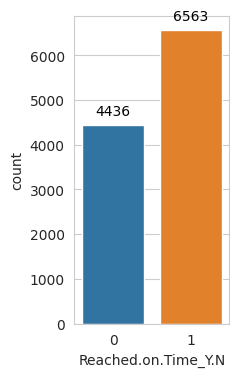

In [ ]:
# Countplot target variable visualization
plt.figure(figsize=(2, 4))
ax = sns.countplot(x=df['Reached.on.Time_Y.N'], data=df)

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                textcoords='offset points')

Berdasarkan plot diatas terlihat bahwa terdapat masalah dalam proses pengiriman barang dimana barang yang dikirimkan tidak tepat waktu lebih banyak dibandingkan barang yang dikirimkan tepat waktu. 

In [ ]:
# Create a new dataframe 
shipping_df = df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
                   'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender',
                   'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']]

In [ ]:
#Menambah kolom `Customer_rating` dan `Reached.on.Time_Y.N` bertipe kategorikal
shipping_df['Customer_Rating_cat'] = np.where(shipping_df['Customer_rating']==1, 'Bintang 1',
                                          np.where(shipping_df['Customer_rating']==2, 'Bintang 2',
                                                   np.where(shipping_df['Customer_rating']==3, 'Bintang 3',
                                                            np.where(shipping_df['Customer_rating']==4, 'Bintang 4', 'Bintang 5'))))

In [ ]:
shipping_df['Reached.on.Time_cat'] = np.where(shipping_df['Reached.on.Time_Y.N'] == 0, 'No', 'Yes')

In [ ]:
shipping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
 11  Customer_Rating_cat  10999 non-null  object
 12  Reached.on.Time_cat  10999 non-null  object
dtypes: int64(7), object(6)
memory usage: 1.1+ MB


In [ ]:
shipping_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_Rating_cat,Reached.on.Time_cat
0,D,Flight,4,2,177,3,low,F,44,1233,1,Bintang 2,Yes
1,F,Flight,4,5,216,2,low,M,59,3088,1,Bintang 5,Yes
2,A,Flight,2,2,183,4,low,M,48,3374,1,Bintang 2,Yes
3,B,Flight,3,3,176,4,medium,M,10,1177,1,Bintang 3,Yes
4,C,Flight,2,2,184,3,medium,F,46,2484,1,Bintang 2,Yes


| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | Customer ID Number | 28, 128, 828, 10288
| Warehouse_block | Nominal | Warehouse to Store the Product | A, B, C, D, F
| Mode_of_Shipment | Nominal | Mode of Product Shipping | Flight, Road, Ship
| Customer_care_calls | Discrete | Number of Calls Made | 1, 2, 5, 7
| Customer_rating | Ordinal | Company Rating by Customers | 5: Best - 4: Better - 3: Neutral - 2: Bad - 1: Worst
| Cost_of_the_Product | Discrete | Cost of Product | 177, 216, 252 
| Prior_purchases | Discrete | Number of Prior Purchase | 3, 2, 4
| Product_importance | Ordinal | Product Importance Parameter | Low, Medium, High
| Gender | Nominal | Customer Gender | Male, Female
| Discount_offered | Discrete | Product Discount  | 65, 10, 16
| Weight_in_gms | Continous | Product Weight in grams | 2484, 1177, 1233
| Reached.on.Time_Y.N | Nominal | Target Variable, 1: NOT reached on time - 0: REACHED on time | 1, 0



# Univariate Analysis

In [ ]:
# New column grouping with the addition of customer rating and reach on time as category types

categoric = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Customer_Rating_cat','Reached.on.Time_cat']
numeric = ['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']

## Boxplot - Numeric

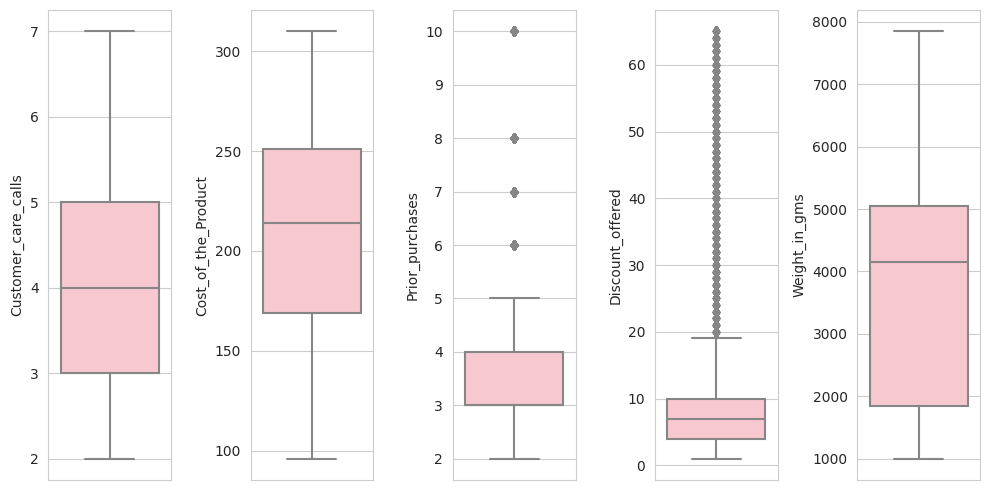

In [ ]:
features = numeric
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='pink', orient='v')
  plt.tight_layout()

Berdasarkan boxplot data numerik diatas, terlihat bahwa kolom Prior_purchases dan Discount_offered memiliki outlier. Nantinya outlier perlu dilakukan penanganan melalui quantile range (QR).

## Distribution Plot - Numeric

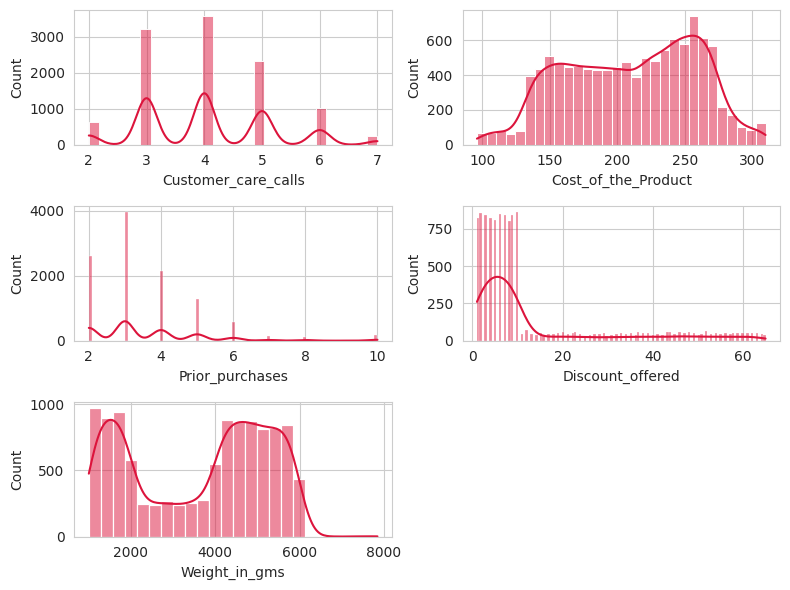

In [ ]:
features = numeric
plt.figure(figsize=(8, 6))
for i in range(0, len(numeric)):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='crimson')
    plt.xlabel(features[i])
    plt.tight_layout()

Berdasarkan distribusi plot data numerik diatas, terlihat bahwa feature Discount_offered memiliki distribusi right skewed sedangkan feature Cost_of_the_Product dan Weight_in_gms berdistribusi bimodal dan feature lainnya memiliki lebih dari dua puncak (multinom). Pada feature Discount_offered perlu dilakukan log transfrmation agar lebih mendekati distribusi normal.

## KDE plot - Numeric

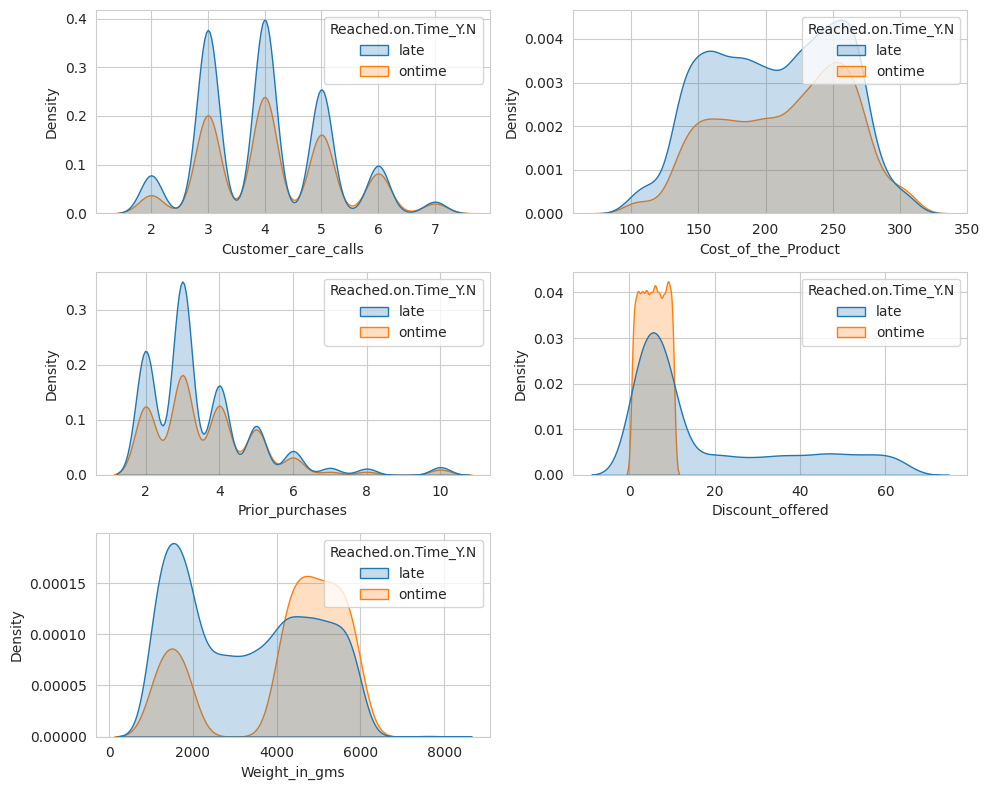

In [ ]:
# KDE plot with target hue

plt.figure(figsize=(10,8))
for i in range(0, len(numeric)):
    plt.subplot(3,2, i+1)
    df['Reached.on.Time_Y.N'].replace({1:'late', 0:'ontime'}, inplace=True)
    sns.kdeplot(data=df, x=df[numeric[i]], hue='Reached.on.Time_Y.N', fill='True')
    plt.tight_layout()

*   Pada feature Customer_care_calls, banyak panggilan 7 memiliki rasio keterlambatan yang kecil dibandingkan banyak panggilan lainnya. 
*   Pada feature Discount_offered terlihat bahwa barang dengan diskon 0-18 memiliki peluang besar terkirim tepat waktu.


## Violin Plot - Numeric

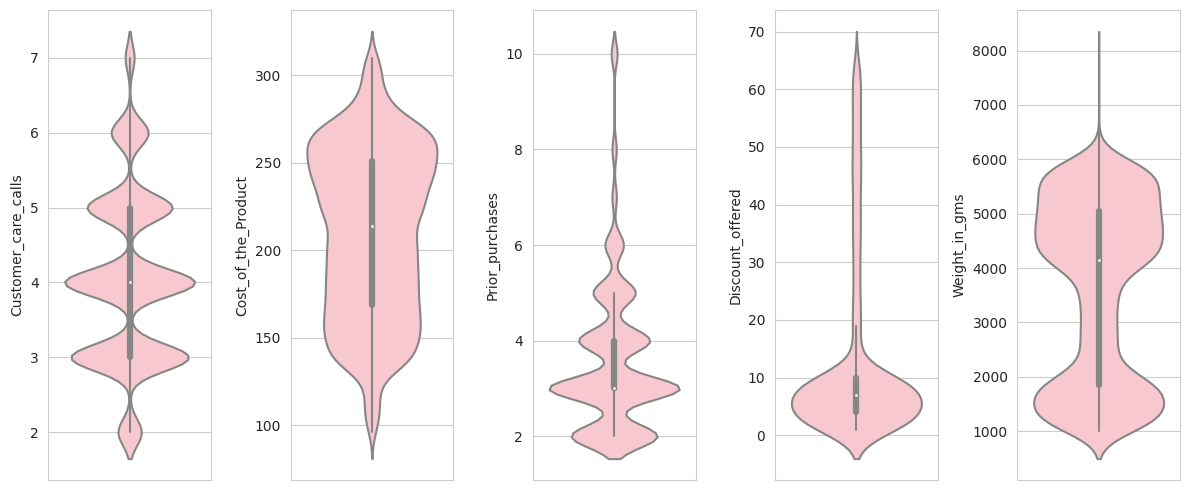

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.violinplot(y=df[numeric[i]], color='pink', orient='v')
    plt.tight_layout()

## Count Plot - Categoric

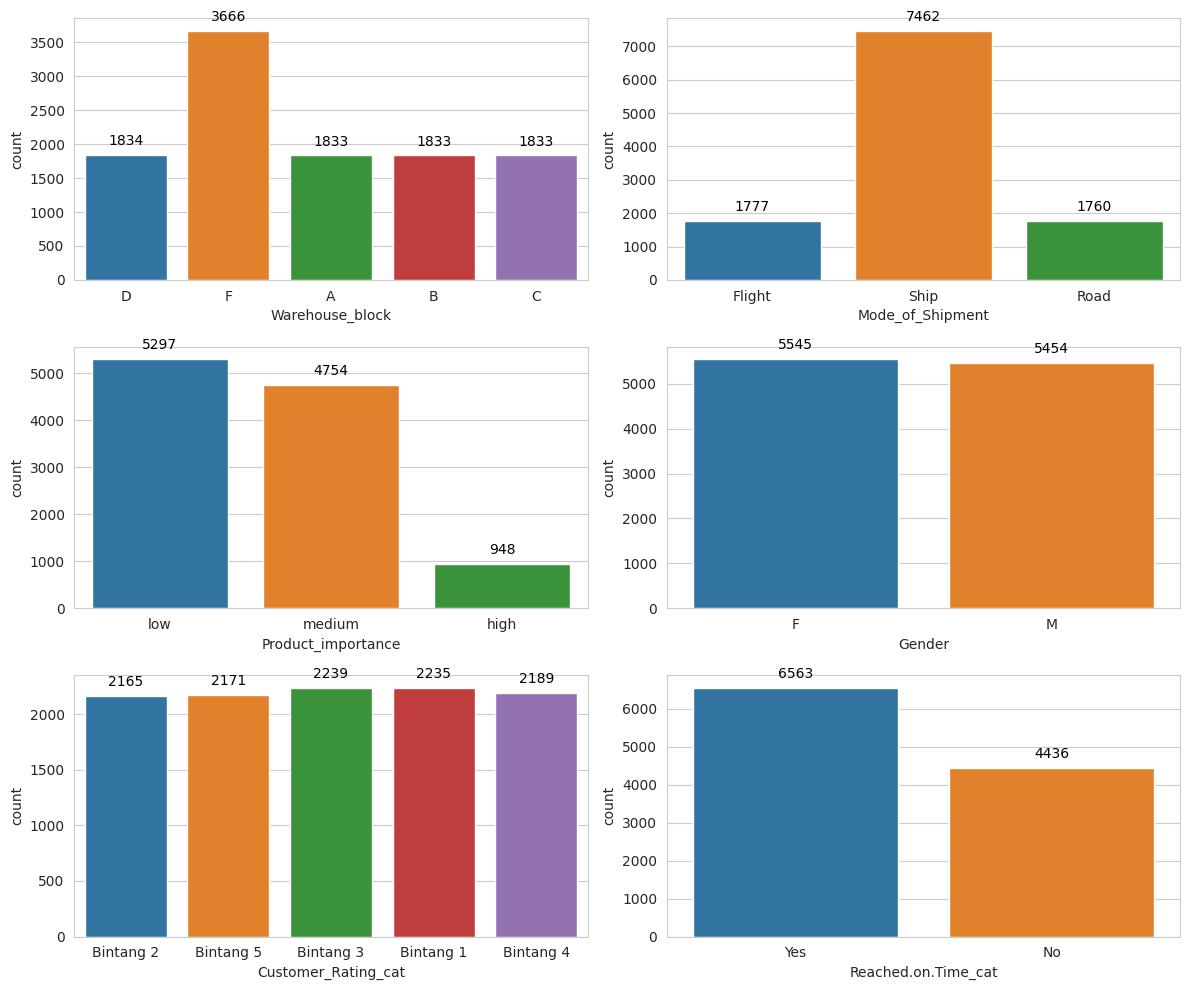

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(0, len(categoric)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x = shipping_df[categoric[i]], orient='v')
    
    # Add annotations for each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.0f}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                    textcoords='offset points')
        
    plt.tight_layout()

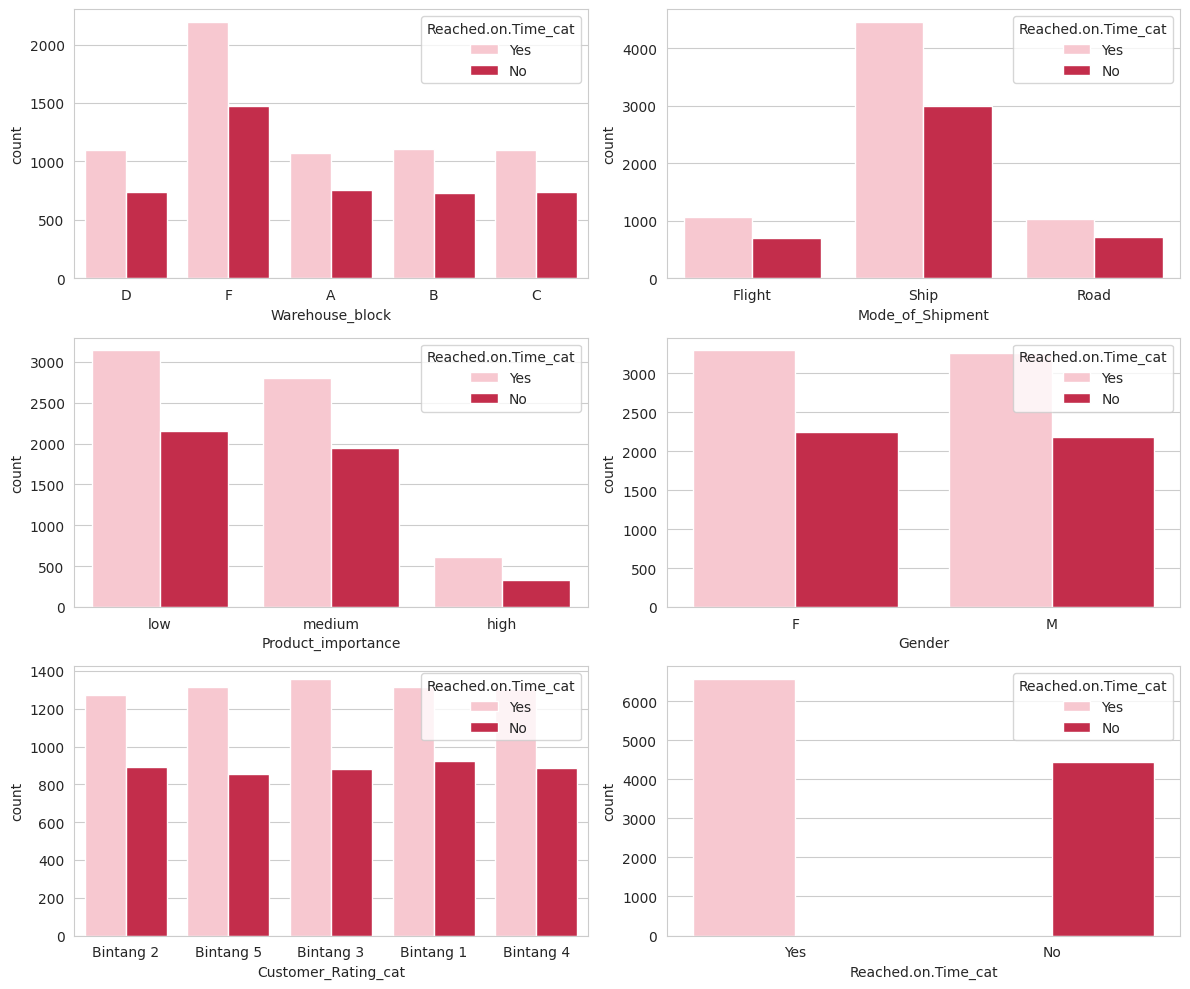

In [ ]:
features = categoric
plt.figure(figsize=(12,10))

# Membuat daftar warna untuk kategori late dan ontime
colors = ['#ffc0cb', '#dc143c']

for i in range(0, len(features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=shipping_df, x=features[i], hue='Reached.on.Time_cat', palette=colors)
    sns.set_style('whitegrid')
    plt.tight_layout()

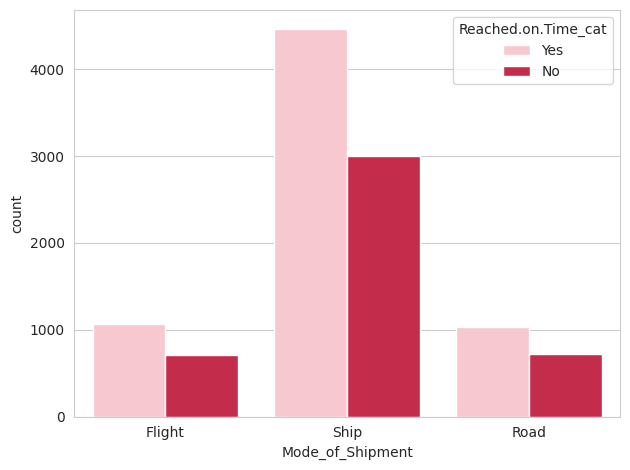

In [ ]:
plt.subplot()
sns.countplot(data=shipping_df, x='Mode_of_Shipment', hue='Reached.on.Time_cat', palette=colors)
sns.set_style('whitegrid')
plt.tight_layout()

# Multivariate Analysis

## Correlation Heatmap

In [ ]:
shipping_df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000,0.012,0.323,0.181,-0.131,-0.277,-0.067
Customer_rating,0.012,1.000,0.009,0.013,-0.003,-0.002,0.013
Cost_of_the_Product,0.323,0.009,1.000,0.124,-0.138,-0.133,-0.074
Prior_purchases,0.181,0.013,0.124,1.000,-0.083,-0.168,-0.056
Discount_offered,-0.131,-0.003,-0.138,-0.083,1.000,-0.376,0.397
Weight_in_gms,-0.277,-0.002,-0.133,-0.168,-0.376,1.000,-0.269
Reached.on.Time_Y.N,-0.067,0.013,-0.074,-0.056,0.397,-0.269,1.000


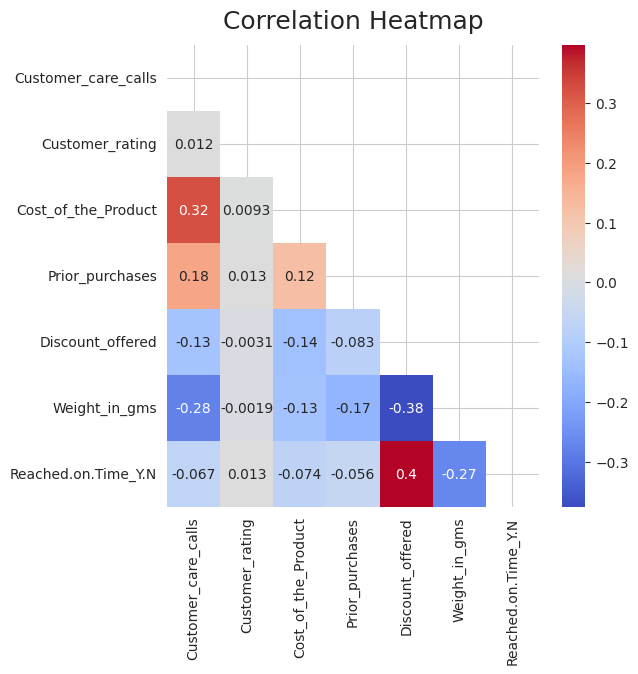

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(6,6))
mask = np.triu(np.ones_like(shipping_df.corr(), dtype= bool))
heatmap = sns.heatmap(shipping_df.corr(), annot=True, mask= mask, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

## Pair plot

<Figure size 1500x1500 with 0 Axes>

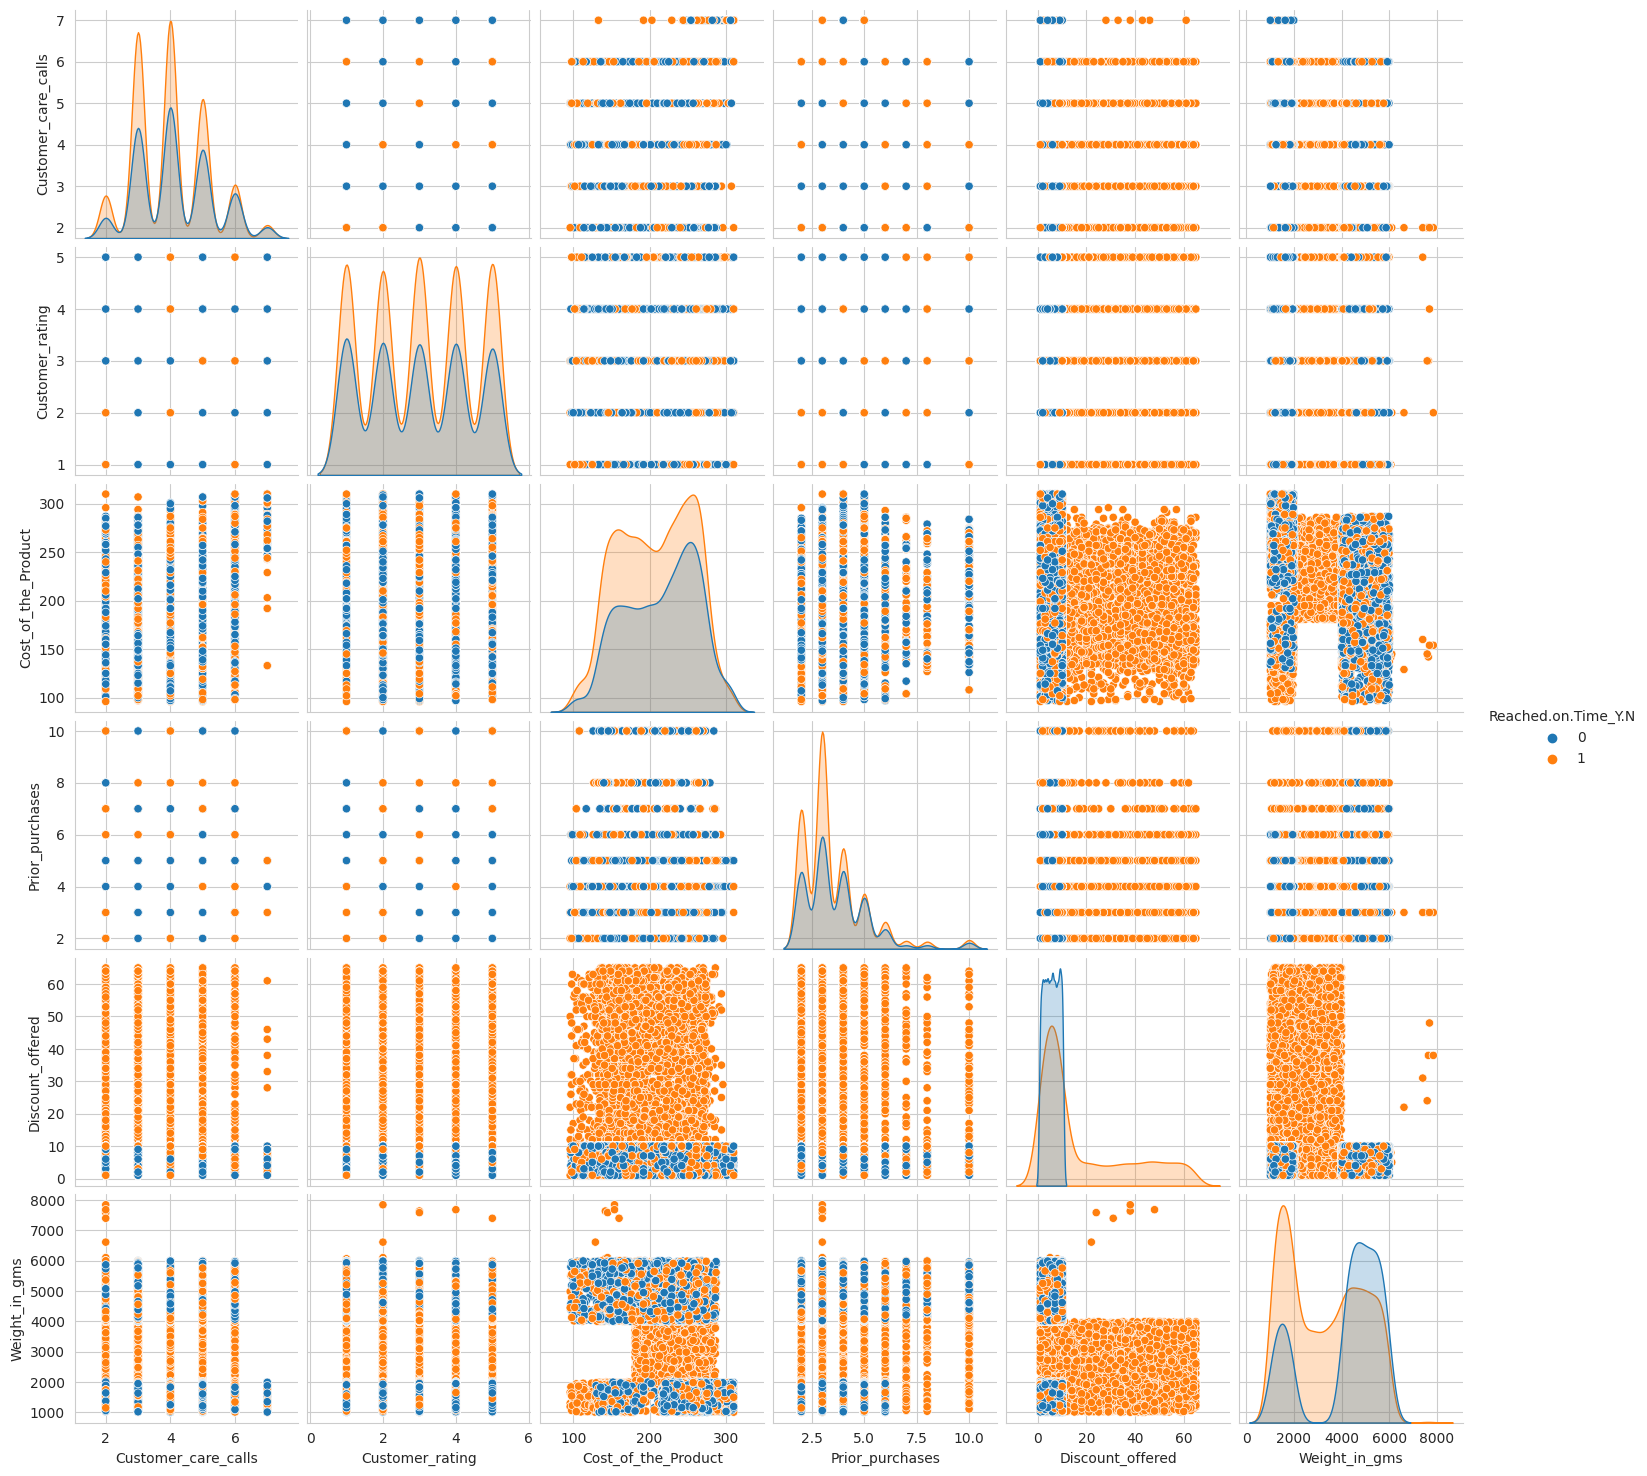

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(shipping_df, diag_kind='kde', hue='Reached.on.Time_Y.N')

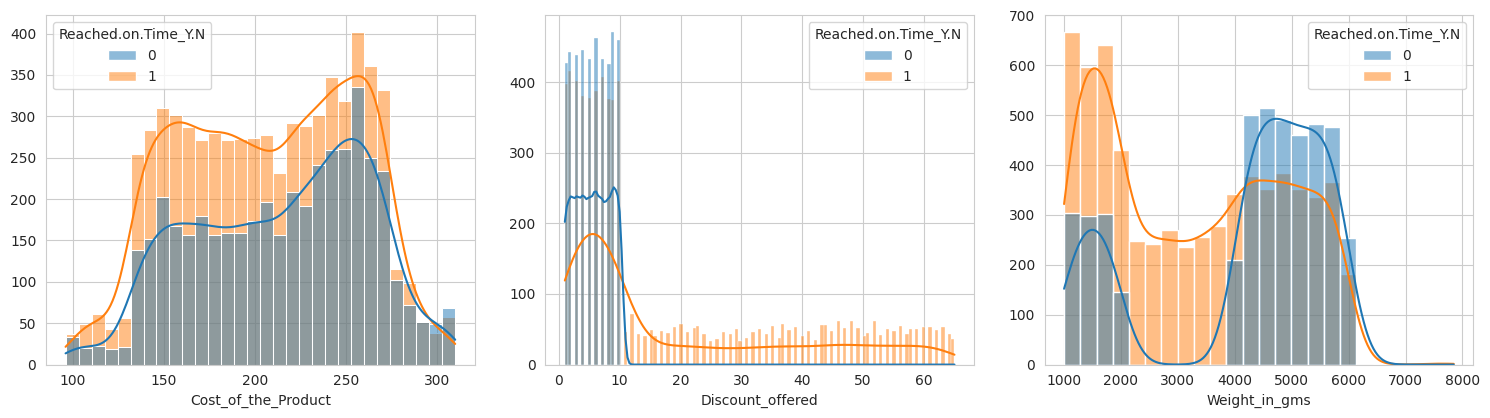

In [ ]:
# Histplot Visualization with Target Hue
flag = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(15, 12))
for i in range(0, len(flag)):
    plt.subplot(len(flag), 3, i+1)
    sns.histplot(data=shipping_df, x=shipping_df[flag[i]], hue=shipping_df['Reached.on.Time_Y.N'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

<ipython-input-78-ff75f53f6d36>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=shipping_df, x='Reached.on.Time_Y.N', hue=features[i])


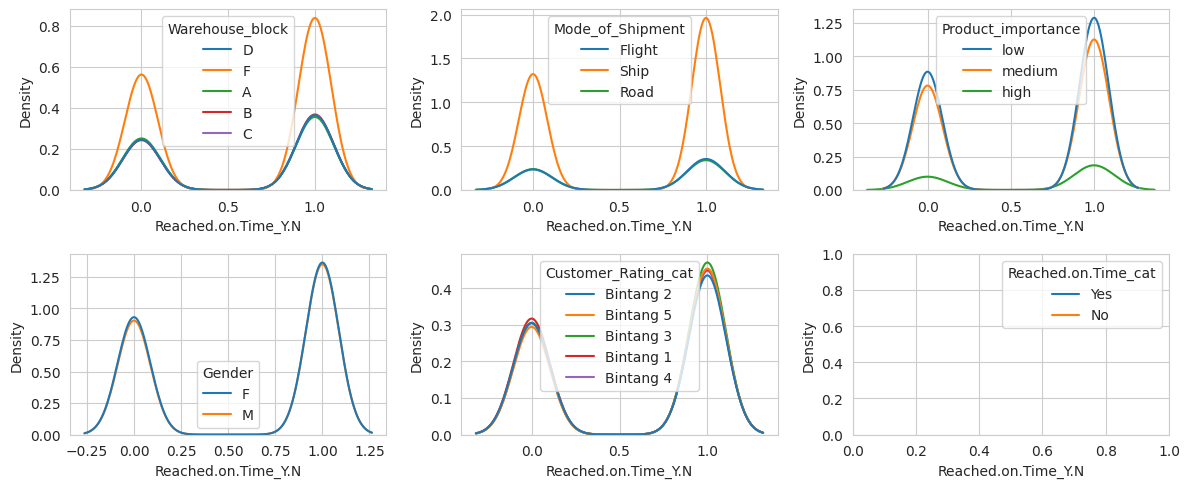

In [ ]:
features = categoric
plt.figure(figsize=(12, 7))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1) 
    sns.kdeplot(data=shipping_df, x='Reached.on.Time_Y.N', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

# Feature Selection

## Feature Selection using Anova

In [ ]:
# split dataset into features (X) and target (y)
X = df[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
y = df['Reached.on.Time_Y.N']

# perform ANOVA feature selection
f_scores, p_values = f_classif(X, y)

# create a dataframe to store feature names, f-scores, and p-values
anova_results = pd.DataFrame({'Features': X.columns, 'F-Scores': f_scores, 'P-Values': p_values})

# sort the dataframe by descending f-scores
anova_results = anova_results.sort_values(by='F-Scores', ascending=False)

# print the feature scores
print(anova_results)


              Features  F-Scores    P-Values
3     Discount_offered  2058.843   0.000e+00
4        Weight_in_gms   856.402  2.355e-181
1  Cost_of_the_Product    59.874   1.100e-14
0  Customer_care_calls    49.775   1.828e-12
2      Prior_purchases    33.997   5.676e-09


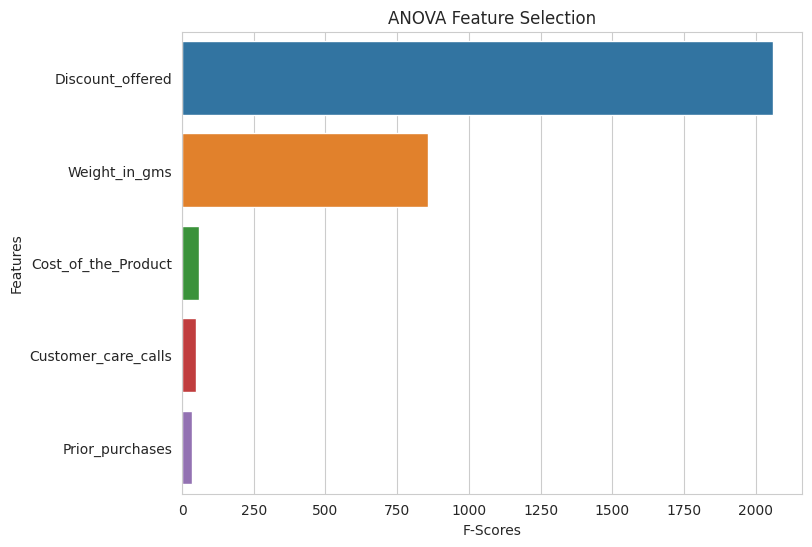

In [ ]:
# create horizontal bar plot for f-scores
plt.figure(figsize=(8, 6))
sns.barplot(x='F-Scores', y='Features', data=anova_results, orient='h')
plt.title('ANOVA Feature Selection')
plt.xlabel('F-Scores')
plt.ylabel('Features')
plt.show()

## SelectKBest from Anova

In [ ]:
# create a SelectKBest object
selector = SelectKBest(f_classif, k=3)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']


Berdasarkan uji Anova, terdapat 3 buah feature yang paling relevan yang dipilih dengan menggunakan KBest yaitu Discount_offered, Weight_in_gms, dan Cost_of_the_Product.

# Feature Selection using Chi2

In [ ]:
# split dataset into features (X) and target (y)
X = shipping_df[['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Customer_Rating_cat']]
y = df['Reached.on.Time_Y.N']

# convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, columns=X.columns)

# perform ANOVA feature selection
chi2_scores, p_values = chi2(X, y)

# create a dataframe to store feature names, f-scores, and p-values
chi2_results = pd.DataFrame({'Features': X.columns, 'chi2_scores': chi2_scores, 'P-Values': p_values})

# sort the dataframe by descending f-scores
chi2_results = chi2_results.sort_values(by='chi2_scores', ascending=False)

# print the feature scores
print(chi2_results)

                         Features  chi2_scores   P-Values
8         Product_importance_high    1.111e+01  8.602e-04
17  Customer_Rating_cat_Bintang 5    8.918e-01  3.450e-01
15  Customer_Rating_cat_Bintang 3    8.192e-01  3.654e-01
0               Warehouse_block_A    7.956e-01  3.724e-01
13  Customer_Rating_cat_Bintang 1    7.893e-01  3.743e-01
10      Product_importance_medium    7.693e-01  3.804e-01
14  Customer_Rating_cat_Bintang 2    6.809e-01  4.093e-01
6           Mode_of_Shipment_Road    5.437e-01  4.609e-01
9          Product_importance_low    3.352e-01  5.626e-01
1               Warehouse_block_B    2.389e-01  6.250e-01
5         Mode_of_Shipment_Flight    1.762e-01  6.746e-01
12                       Gender_M    1.219e-01  7.270e-01
11                       Gender_F    1.199e-01  7.291e-01
4               Warehouse_block_F    4.837e-02  8.259e-01
7           Mode_of_Shipment_Ship    2.349e-02  8.782e-01
16  Customer_Rating_cat_Bintang 4    1.890e-02  8.906e-01
3             

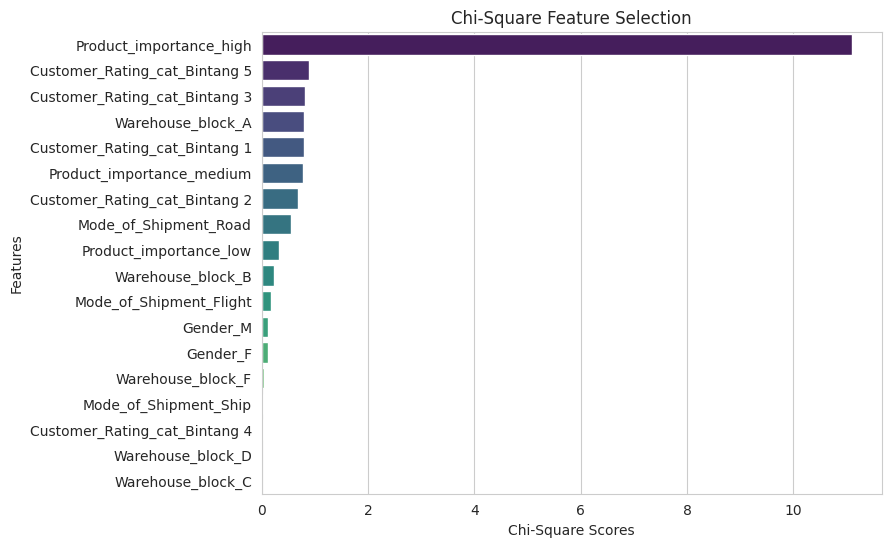

In [ ]:
# set style
sns.set_style('whitegrid')

# create horizontal bar plot for chi-square scores
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='chi2_scores', y='Features', data=chi2_results, palette='viridis')

# set title and labels
ax.set_title('Chi-Square Feature Selection')
ax.set_xlabel('Chi-Square Scores')
ax.set_ylabel('Features')

# show the plot
plt.show()

### SelectKBest from chi2

In [ ]:
# create a SelectKBest object
selector = SelectKBest(chi2, k=2)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['Product_importance_high', 'Customer_Rating_cat_Bintang 5']


Berdasarkan uji Chi2 terdapat 2 buah feature yang paling relevan yaitu Product_importance_high dan Customer_rating_cat_bintang 5 dengan Chi2 score tertinggi. Feature-feature lainnya yang memiliki hubungan rendah dengan target (Reached.on.Time_Y.N) lebih baik didrop untuk stage selanjutnya yaitu Data Pre-Processing.


# Business Insight